<a href="https://colab.research.google.com/github/amir-baradaran/Geram18Ayar/blob/main/Gold_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
'''
!pip install bs4
!pip install pmdarima
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
from bs4 import BeautifulSoup

import seaborn as sns
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima.utils import ndiffs
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import os
import datetime
plt.style.use('fivethirtyeight')


Geram18Ayar price prediction by LSTM

In [479]:
from google.colab import files
uploaded=files.upload()

Saving all_data.csv to all_data.csv


In [480]:
df=pd.read_csv('all_data.csv')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Name,Date,Open,High,Low,Close,Period,Unnamed: 7,Unnamed: 8
2013-04-16,Gram18Ayar,4/16/2013,1246600,1251200,1230400,1246600,D,92/1/27,NaN
2013-04-17,Gram18Ayar,4/17/2013,1244300,1248900,1237400,1246600,D,NaN,NaN
2013-04-20,Gram18Ayar,4/20/2013,1253500,1261600,1250100,1253500,D,NaN,NaN
2013-04-21,Gram18Ayar,4/21/2013,1254700,1272000,1254200,1272000,D,92/2/1,NaN
2013-04-22,Gram18Ayar,4/22/2013,1278900,1306600,1275500,1289300,D,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-03-12,Gram18Ayar,3/12/2023,20661200,21342200,19691600,19968600,D,NaN,NaN
2023-03-13,Gram18Ayar,3/13/2023,20845800,21873100,20845800,21700000,D,NaN,NaN
2023-03-14,Gram18Ayar,3/14/2023,22000100,23177400,22000100,22715700,D,NaN,NaN
2023-03-15,Gram18Ayar,3/15/2023,23108200,23223600,22484900,23165900,D,NaN,NaN


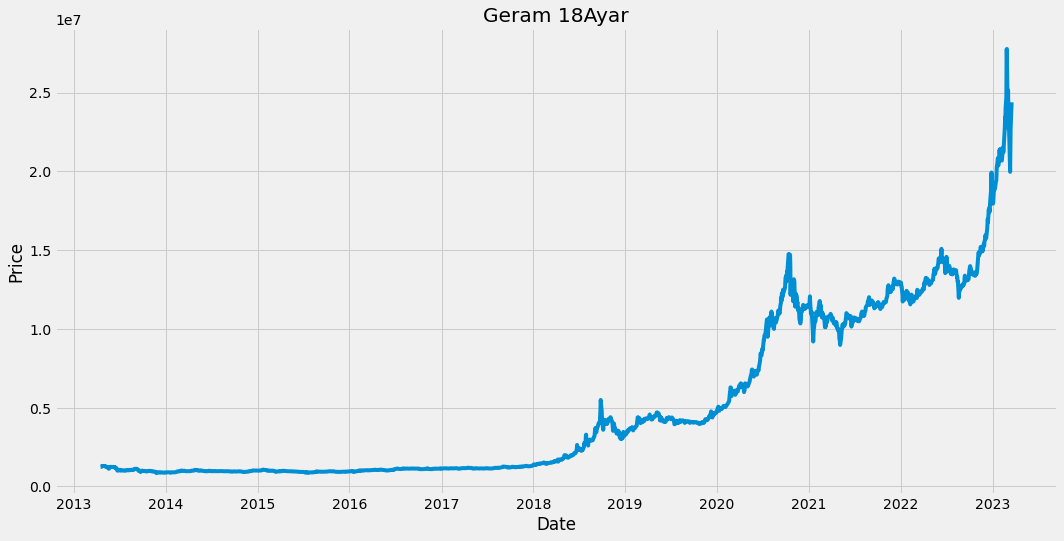

In [481]:
plt.figure(figsize=(16,8))
plt.title('Geram 18Ayar')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df['Close'])
plt.show()

In [482]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.8)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [483]:
training_data=scaled_data[0:training_data_len , :]

In [484]:
xtrain=[]
ytrain=[]
n=150

In [485]:
for i in range(n,len(training_data)):
    xtrain.append(training_data[i-n:i , 0])
    ytrain.append(training_data[i,0])

In [486]:
xtrain , ytrain = np.array(xtrain),np.array(ytrain)

In [487]:
xtrain=np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))
xtrain.shape

(1760, 150, 1)

In [488]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(xtrain.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [489]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(xtrain,ytrain,batch_size=1,epochs=15)

Epoch 1/15
1760/1760 [==============================] - 23s 11ms/step - loss: 3.3943e-04
Epoch 2/15
1760/1760 [==============================] - 19s 11ms/step - loss: 2.8988e-04
Epoch 3/15
1760/1760 [==============================] - 19s 11ms/step - loss: 1.4076e-04
Epoch 4/15
1760/1760 [==============================] - 19s 11ms/step - loss: 1.2133e-04
Epoch 5/15
1760/1760 [==============================] - 19s 11ms/step - loss: 9.9186e-05
Epoch 6/15
1760/1760 [==============================] - 19s 11ms/step - loss: 1.3649e-04
Epoch 7/15
1760/1760 [==============================] - 19s 11ms/step - loss: 8.5925e-05
Epoch 8/15
1760/1760 [==============================] - 19s 11ms/step - loss: 8.9134e-05
Epoch 9/15
1760/1760 [==============================] - 19s 11ms/step - loss: 7.6830e-05
Epoch 10/15
1760/1760 [==============================] - 19s 11ms/step - loss: 8.3402e-05
Epoch 11/15
1760/1760 [==============================] - 19s 11ms/step - loss: 6.7878e-05
Epoch 12/15
1760/17

In [490]:
test_data=scaled_data[training_data_len - n : , :]
xtest=[]
ytest=dataset[training_data_len: , :]
for i in range(n,len(test_data)):
    xtest.append(test_data[i-n:i,0])  

In [491]:
xtest=np.array(xtest)
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))

In [492]:
prediction=model.predict(xtest)
prediction=scaler.inverse_transform(prediction)
rmse =np.sqrt(np.mean(((prediction- ytest)**2)))
print(rmse)

15/15 [==============================] - 1s 9ms/step
431616.20816670376


In [376]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['prediction']=prediction

<ipython-input-376-345babb7f3ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction']=prediction


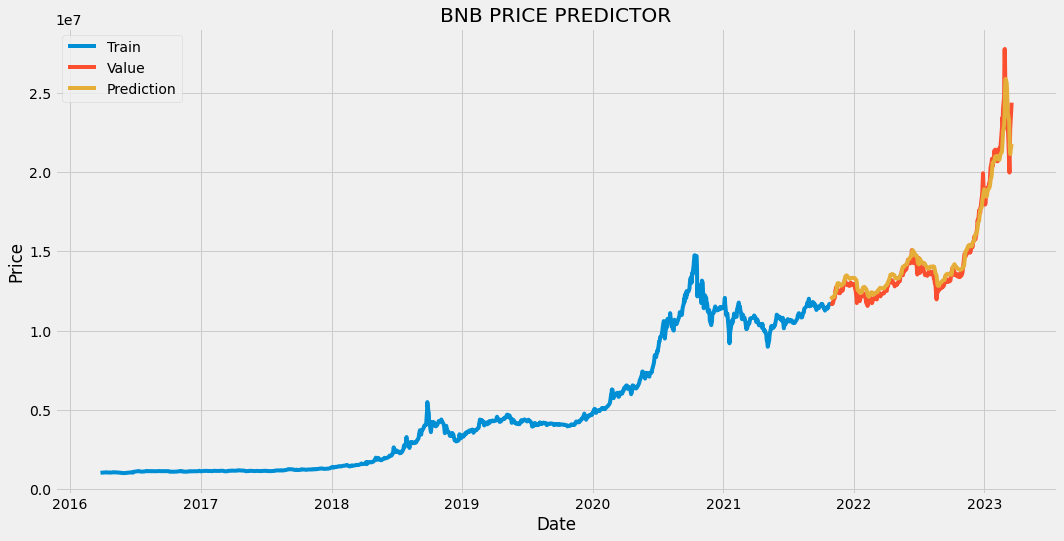

In [377]:
plt.figure(figsize=(16,8))
plt.title('BNB PRICE PREDICTOR')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Train','Value','Prediction'])
plt.show()

In [75]:
forecast_range = 1
new_df = df.filter(['Close'])

In [76]:
pred_df = pd.DataFrame()
pred_df['Date'] = pd.date_range(start = df.Date.iloc[-1] , periods = forecast_range+1 , closed = 'right')

pred_df =pred_df.set_index(pd.DatetimeIndex(pred_df['Date'].values))

<ipython-input-76-0fdf7f96294e>:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  pred_df['Date'] = pd.date_range(start = df.Date.iloc[-1] , periods = forecast_range+1 , closed = 'right')


In [77]:
pred_df

,Date
2023-03-19,2023-03-19


In [80]:
predictiondata = []

In [81]:
for i in range(0, forecast_range):
    last_values = new_df[-n:].values
    last_values_scaled = scaler.transform(last_values)
    X_input = []
    X_input.append(last_values_scaled)
    X_input = np.array(X_input)
    X_test = np.reshape(X_input, (X_input.shape[0], X_input.shape[1], 1))
    pred_value = model.predict(X_input)
    pred_value_unscaled = scaler.inverse_transform(pred_value)
    dfindex = pred_df.iloc[[i]].index 
    new_df = new_df.append(pd.DataFrame({"Close": pred_value_unscaled[0,0]}, index=dfindex))
    predictiondata.append(pred_value_unscaled[0,0])

1/1 [==============================] - 0s 25ms/step


<ipython-input-81-a435facee083>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(pd.DataFrame({"Close": pred_value_unscaled[0,0]}, index=dfindex))


In [82]:
new_df.tail(1)

,Close
2023-03-19,23227226.0


**Geram18Ayar price prediction by ARIMA**

In [493]:
data = list(df["Close"])

In [494]:
result = adfuller(data)
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
  print("\t",key, ": ", val)

1. ADF :  2.5359433021461695
2. P-Value :  0.9990605318248951
3. Num Of Lags :  25
4. Num Of Observations Used For ADF Regression: 2361
5. Critical Values :
	 1% :  -3.4331227335658987
	 5% :  -2.862764947264235
	 10% :  -2.5674220922279143


In [495]:
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [496]:
len_test= math.ceil(len(data)*0.2)  
x_train= data[:-len_test]
x_test = data[-len_test:]
print(len(x_train),len(x_test))

1909 478


In [497]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=1.85 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=66040.550, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=65612.016, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=65188.399, Time=0.25 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=65062.375, Time=0.36 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=65019.160, Time=0.54 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=64906.201, Time=0.68 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=4.55 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=2.17 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=64908.191, Time=0.74 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 11.716 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2387
Model:  

In [527]:
model = sm.tsa.arima.ARIMA(data, order=(5,2,1))
     

In [528]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2387
Model:                 ARIMA(5, 2, 1)   Log Likelihood              -32296.501
Date:                Sun, 19 Mar 2023   AIC                          64607.003
Time:                        20:23:08   BIC                          64647.442
Sample:                             0   HQIC                         64621.719
                               - 2387                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1040      0.008     12.746      0.000       0.088       0.120
ar.L2         -0.0981      0.006    -15.640      0.000      -0.110      -0.086
ar.L3          0.0645      0.006      9.965      0.000       0.052       0.077
ar.L4         -0.0198      0.011     -1.746      0.081      -0.042       0.002
ar.L5         -0.0747      0.005    -14.082      0.000      -0.085      -0.064
ma.L1         -0.9954      0.001   -967.963      0.000      -0.997      -0.993
sigma2      3.837e+10   7.31e-14   5.25e+23      0.000    3.84e+10    3.84e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            532971.05
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):             148.79   Skew:                            -0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        76.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.16e+37. Standard errors may be unstable.
"""

In [529]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([10438745.36352703, 10533276.27210989, 10671051.78920331,
       10763124.03601628, 10851662.9371747 , 10972762.84708847,
       10857009.168299  , 10861137.27050496, 10505584.83780871,
       10636426.77257188, 10581950.91151415, 10736100.36595653,
       10593710.40555936, 10356171.64711086, 10348176.69021896,
       10388670.62785753, 10446352.19262856, 10396342.78552911,
       10400003.41530666, 10396792.72069673, 10173808.19629967,
       10486693.46122893, 10164322.59062121, 10065872.36061798,
       10080621.12266934,  9902994.1860713 , 10027217.13063627,
        9969127.84733863,  9710386.49036653,  9399687.74122248,
        9410762.59715908,  8925823.07752437,  9408127.50577616,
        9365003.74437682,  9742698.08677555,  9876571.44828933,
        9935179.49477512, 10320400.94926582, 10121177.60318626,
       10163618.80285425, 10296122.95049299, 10108555.39311949,
       10251199.52553781, 10294627.84195544, 10370372.49231393,
       10339721.01317572, 10465189.61680

In [530]:
s = pd.Series(pred, index =df.index[-len(x_test):])   #len(x_test)
s

2021-03-15    1.043875e+07
2021-03-16    1.053328e+07
2021-03-17    1.067105e+07
2021-03-27    1.076312e+07
2021-03-28    1.085166e+07
                  ...     
2023-03-12    2.041121e+07
2023-03-13    2.033940e+07
2023-03-14    2.187207e+07
2023-03-15    2.265492e+07
2023-03-18    2.346688e+07
Length: 478, dtype: float64

<Axes: >

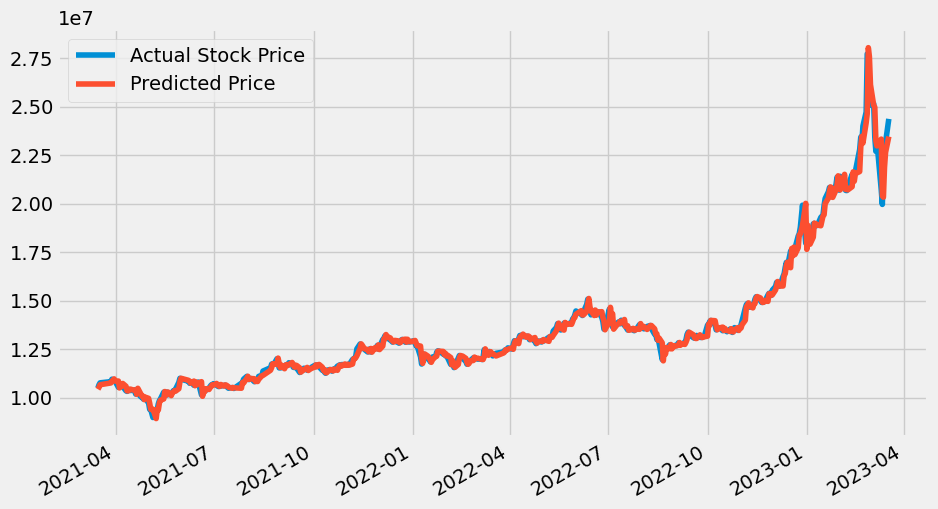

In [531]:
plt.figure(figsize=(10,6), dpi=100)
df['Close'][-len(x_test):].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)

predict next day

In [532]:
a = model.forecast(step=1)[0]
print(a)

24591480.601948548


In [533]:
rmse =sqrt(mean_squared_error(x_test,pred))
print(rmse)

332028.6096367343


Predicting Future 10 values

In [ ]:
pred_future = model.predict(start=end,end=end+10)
pred_future

array([307.61342017, 310.26298624, 311.00690363, 308.7458338 ,
       309.17247616, 310.4407469 , 310.0384948 , 308.72367332,
       310.07226681, 310.06634067, 309.43046985])

In [ ]:
start_date = datetime.datetime(2023,2,12)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(11)]

In [ ]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2023-02-12    307.613420
2023-02-13    310.262986
2023-02-14    311.006904
2023-02-15    308.745834
2023-02-16    309.172476
2023-02-17    310.440747
2023-02-18    310.038495
2023-02-19    308.723673
2023-02-20    310.072267
2023-02-21    310.066341
2023-02-22    309.430470
dtype: float64

<AxesSubplot:xlabel='Date'>

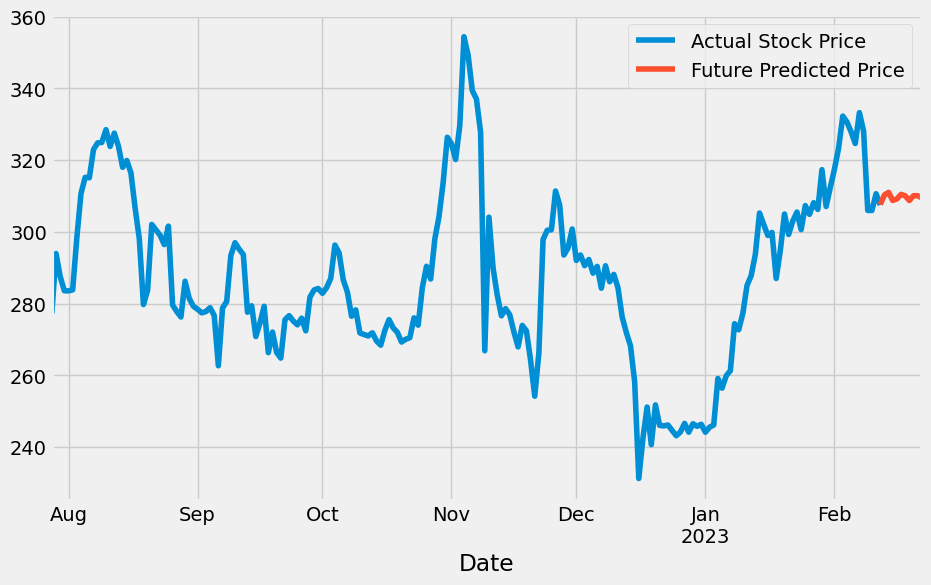

In [ ]:
plt.figure(figsize=(10,6), dpi=100)
df['Close'][-200:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True)
     